In [1]:
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
from datetime import datetime
from labeling_tool import Trie, TrieNode, search_in_trie

['nosql', 'solid', 'kibana', 'software development', 'swagger', 'postman', 'sql', 'cypress']
>5 years working on qa
working knowledge of:
sql & nosql databases
postman, insomnia and/or swagger
kibana
sentry
background in development
comfortable presenting to large internal groups and leadership team members
experience developing integration tests with cypress or similar
analytical skills
team player
have a solid understanding of the entire software development life cycle
have the ability to learn quickly and manage yourself independently
fluency in english
don't fulfill all the criteria? don't worry - they're just meant as a rough description of what we're looking for


In [2]:
df = pd.read_csv('./transform_datn/extracted_TopCV.csv')

In [3]:
df['company_position'] = df['company_position'].apply(ast.literal_eval)
df['job_detail_job_requirements_line'] = df['job_detail_job_requirements_line'].apply(ast.literal_eval)
df['job_detail_year_of_exp'] = df['job_detail_year_of_exp'].apply(ast.literal_eval)
df['job_detail_job_level'] = df['job_detail_job_level'].apply(ast.literal_eval)

In [4]:
df.head()

,url,source,crawl_date,company_name,company_position,job_detail_detail_position,company_size,job_detail_name,job_detail_salary,job_detail_part_time,job_detail_full_time,job_detail_remote,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level
0,https://www.topcv.vn/viec-lam/senior-business-...,TopCv,2024-04-21 16:07:23,Công ty CP Kinh doanh F88,[Hà Nội],"- Hà Nội: 275 Nguyễn Trãi, Thanh Xuân, Hà Nội,...",5000+ nhân viên,Senior Business Analyst (Có Kinh Nghiệm Bankin...,20 - 40 triệu,False,True,False,"[Yêu cầu ứng viên, Học vấn: Tốt nghiệp Đại học...","[3 năm, Việc làm liên quan, 3 năm]",[senior]
1,https://www.topcv.vn/viec-lam/nhan-vien-ky-thu...,TopCv,2024-04-21 16:07:31,CHI NHÁNH 4 - CÔNG TY TNHH TRUYỀN HÌNH CÁP SAI...,[Hồ Chí Minh],- Hồ Chí Minh: Thủ Đức,25-99 nhân viên,Nhân Viên Kỹ Thuật Truyền Hình Cáp - Không Yêu...,7 - 10 triệu,False,True,False,"[Yêu cầu ứng viên, - Chiều cao : 1m60 trở lên,...","[Không yêu cầu kinh nghiệm, Việc làm liên quan...",[]
2,https://www.topcv.vn/viec-lam/it-comtor-tieng-...,TopCv,2024-04-21 16:07:46,CÔNG TY TNHH BTC STUDIO,[Hà Nội],"- Hà Nội: Toà nhà Tây Hà, 19 Tố Hữu, Trung Văn...",25-99 nhân viên,IT Comtor Tiếng Nhật Thu Nhập Lên Đến 35Triệu/...,15 - 35 triệu,False,True,True,"[Yêu cầu ứng viên, Tiếng Nhật N2 giao tiếp tốt...","[1 năm, Việc làm liên quan, 1 năm]",[]
3,https://www.topcv.vn/viec-lam/ux-designer-upto...,TopCv,2024-04-21 16:07:56,CÔNG TY CỔ PHẦN SYSTEMATIC FUNCTIONS,[Hà Nội],"- Hà Nội: Khu đô thị Mễ Trì Hạ, Mễ Trì, Nam Từ...",100-499 nhân viên,UX Designer (Upto 30M),Tới 30 triệu,False,True,False,"[Yêu cầu ứng viên, ● Có kinh nghiệm làm việc t...","[Không yêu cầu kinh nghiệm, Việc làm liên quan...",[]
4,https://www.topcv.vn/viec-lam/back-office-mana...,TopCv,2024-04-21 16:08:23,CÔNG TY CỔ PHẦN CÔNG NGHỆ NAMI,[Hồ Chí Minh],- Hồ Chí Minh: Villa A4-2 Khu dân cư EverRich ...,25-99 nhân viên,Back Office Manager (Trưởng Phòng Hành Chính N...,Thoả thuận,False,True,False,"[Yêu cầu ứng viên, - Bachelor's degree in Busi...","[3 năm, Việc làm liên quan, 3 năm]",[]


In [5]:
# tmp_df = df.loc[(df['job_detail_full_time'] == False) & (df['job_detail_remote'] == False) & (df['job_detail_hybrid'] == False)]
# tmp_df.info()

In [6]:
df.loc[(df['job_detail_remote'] == True)].head()

,url,source,crawl_date,company_name,company_position,job_detail_detail_position,company_size,job_detail_name,job_detail_salary,job_detail_part_time,job_detail_full_time,job_detail_remote,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level
2,https://www.topcv.vn/viec-lam/it-comtor-tieng-...,TopCv,2024-04-21 16:07:46,CÔNG TY TNHH BTC STUDIO,[Hà Nội],"- Hà Nội: Toà nhà Tây Hà, 19 Tố Hữu, Trung Văn...",25-99 nhân viên,IT Comtor Tiếng Nhật Thu Nhập Lên Đến 35Triệu/...,15 - 35 triệu,False,True,True,"[Yêu cầu ứng viên, Tiếng Nhật N2 giao tiếp tốt...","[1 năm, Việc làm liên quan, 1 năm]",[]
36,https://www.topcv.vn/viec-lam/nodejs-reactjs-m...,TopCv,2024-04-21 16:15:17,CÔNG TY TNHH BTC STUDIO,[Hà Nội],"- Hà Nội: Toà nhà Tây Hà, 19 Tố Hữu, Trung Văn...",25-99 nhân viên,NodeJS /ReactJS Middle/Senior (Từ 2 Năm KN) - ...,15 - 35 triệu,False,True,True,"[Yêu cầu ứng viên, Làm việc cẩn thận, chủ động...","[2 năm, Việc làm liên quan, 2 năm]",[senior]
41,https://www.topcv.vn/viec-lam/qa-manual-develo...,TopCv,2024-04-21 16:16:21,DigiEx Group,[Hồ Chí Minh],"- Hồ Chí Minh: QTSC 1 Building, khu phần mềm Q...",100-499 nhân viên,QA Manual Developer (Senior),Thoả thuận,False,True,True,"[Yêu cầu ứng viên, Your Skills and Experience ...","[3 năm, Việc làm liên quan, 3 năm]",[senior]
56,https://www.topcv.vn/viec-lam/ky-su-it-network...,TopCv,2024-04-21 16:20:35,Công Ty TNHH LG CNS VIỆT NAM,[Hà Nội],"- Hà Nội: Tầng 15, Keangnam Landmark 72, Nam T...",100-499 nhân viên,"Kỹ Sư IT Network (CSR Firewall, Networking, En...",Thoả thuận,False,True,True,"[Yêu cầu ứng viên, Bắt buộc, Tốt nghiệp đại họ...","[1 năm, Việc làm liên quan, 1 năm]",[]
116,https://www.topcv.vn/viec-lam/chuyen-vien-test...,TopCv,2024-04-21 16:33:38,Công ty TNHH Digital Innovation,[Hà Nội],"- Hà Nội: Tòa nhà Audi Hà Nội, số 8 Phạm Hùng,...",10-24 nhân viên,Chuyên Viên Tester Từ 2 Năm Kinh Nghiệm,Trên 10 triệu,False,True,True,"[Yêu cầu ứng viên, Kinh nghiệm tối thiểu 2 năm...","[2 năm, Việc làm liên quan, 2 năm]",[]


In [7]:
df.iloc[36]['url']

'https://www.topcv.vn/viec-lam/nodejs-reactjs-middle-senior-tu-2-nam-kn-thu-viec-full-luong-thu-nhap-hap-dan/1242973.html?ta_source=ITJobs_LinkDetail'

In [8]:
df.iloc[875]

url                                 https://www.topcv.vn/viec-lam/game-developer-c...
source                                                                          TopCv
crawl_date                                                        2024-04-21 19:36:08
company_name                        CÔNG TY CỔ PHẦN ĐẦU TƯ CÔNG NGHỆ TRUYỀN THÔNG ...
company_position                                                             [Hà Nội]
job_detail_detail_position          - Hà Nội: 58 Tố Hữu, Nam Từ Liêm. Hà Nội, Nam ...
company_size                                                          25-99 nhân viên
job_detail_name                                        Game Developer (Cocos Creator)
job_detail_salary                                                          Thoả thuận
job_detail_part_time                                                            False
job_detail_full_time                                                             True
job_detail_remote                                     

In [9]:
print(df[df['job_detail_job_level'].apply(lambda x: 'intern' in x)].count())
print(df[df['job_detail_job_level'].apply(lambda x: 'fresher' in x)].count())
print(df[df['job_detail_job_level'].apply(lambda x: 'junior' in x)].count())
print(df[df['job_detail_job_level'].apply(lambda x: 'senior' in x)].count())

url                                 69
source                              69
crawl_date                          69
company_name                        69
company_position                    69
job_detail_detail_position          69
company_size                        69
job_detail_name                     69
job_detail_salary                   69
job_detail_part_time                69
job_detail_full_time                69
job_detail_remote                   69
job_detail_job_requirements_line    69
job_detail_year_of_exp              69
job_detail_job_level                69
dtype: int64
url                                 61
source                              61
crawl_date                          61
company_name                        61
company_position                    61
job_detail_detail_position          61
company_size                        61
job_detail_name                     61
job_detail_salary                   61
job_detail_part_time                61
job_detail_f

In [10]:
df['job_detail_hybrid'] = False
df.loc[(df['job_detail_remote'] == True) & (df['job_detail_full_time'] == True), 'job_detail_hybrid'] = True

In [11]:
df = df.drop('job_detail_remote', axis=1)

In [12]:
df.head()

,url,source,crawl_date,company_name,company_position,job_detail_detail_position,company_size,job_detail_name,job_detail_salary,job_detail_part_time,job_detail_full_time,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level,job_detail_hybrid
0,https://www.topcv.vn/viec-lam/senior-business-...,TopCv,2024-04-21 16:07:23,Công ty CP Kinh doanh F88,[Hà Nội],"- Hà Nội: 275 Nguyễn Trãi, Thanh Xuân, Hà Nội,...",5000+ nhân viên,Senior Business Analyst (Có Kinh Nghiệm Bankin...,20 - 40 triệu,False,True,"[Yêu cầu ứng viên, Học vấn: Tốt nghiệp Đại học...","[3 năm, Việc làm liên quan, 3 năm]",[senior],False
1,https://www.topcv.vn/viec-lam/nhan-vien-ky-thu...,TopCv,2024-04-21 16:07:31,CHI NHÁNH 4 - CÔNG TY TNHH TRUYỀN HÌNH CÁP SAI...,[Hồ Chí Minh],- Hồ Chí Minh: Thủ Đức,25-99 nhân viên,Nhân Viên Kỹ Thuật Truyền Hình Cáp - Không Yêu...,7 - 10 triệu,False,True,"[Yêu cầu ứng viên, - Chiều cao : 1m60 trở lên,...","[Không yêu cầu kinh nghiệm, Việc làm liên quan...",[],False
2,https://www.topcv.vn/viec-lam/it-comtor-tieng-...,TopCv,2024-04-21 16:07:46,CÔNG TY TNHH BTC STUDIO,[Hà Nội],"- Hà Nội: Toà nhà Tây Hà, 19 Tố Hữu, Trung Văn...",25-99 nhân viên,IT Comtor Tiếng Nhật Thu Nhập Lên Đến 35Triệu/...,15 - 35 triệu,False,True,"[Yêu cầu ứng viên, Tiếng Nhật N2 giao tiếp tốt...","[1 năm, Việc làm liên quan, 1 năm]",[],True
3,https://www.topcv.vn/viec-lam/ux-designer-upto...,TopCv,2024-04-21 16:07:56,CÔNG TY CỔ PHẦN SYSTEMATIC FUNCTIONS,[Hà Nội],"- Hà Nội: Khu đô thị Mễ Trì Hạ, Mễ Trì, Nam Từ...",100-499 nhân viên,UX Designer (Upto 30M),Tới 30 triệu,False,True,"[Yêu cầu ứng viên, ● Có kinh nghiệm làm việc t...","[Không yêu cầu kinh nghiệm, Việc làm liên quan...",[],False
4,https://www.topcv.vn/viec-lam/back-office-mana...,TopCv,2024-04-21 16:08:23,CÔNG TY CỔ PHẦN CÔNG NGHỆ NAMI,[Hồ Chí Minh],- Hồ Chí Minh: Villa A4-2 Khu dân cư EverRich ...,25-99 nhân viên,Back Office Manager (Trưởng Phòng Hành Chính N...,Thoả thuận,False,True,"[Yêu cầu ứng viên, - Bachelor's degree in Busi...","[3 năm, Việc làm liên quan, 3 năm]",[],False


# Step 2

In [13]:
def extract_year_of_exp(list_text):
    matches = re.findall(r'\d+', list_text[0])
    return int(matches[0]) if matches else 0

df['job_detail_year_of_exp'] = df['job_detail_year_of_exp'].map(extract_year_of_exp)

In [14]:
df['job_detail_year_of_exp'].isnull().sum()

0

In [15]:
df['job_detail_year_of_exp'].describe()

count    2237.000000
mean        1.883773
std         1.415443
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: job_detail_year_of_exp, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7cc87360e8f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cc87360ee30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cc87360e650>],
 'medians': [<matplotlib.lines.Line2D at 0x7cc87360f370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cc87360f610>],
 'means': []}

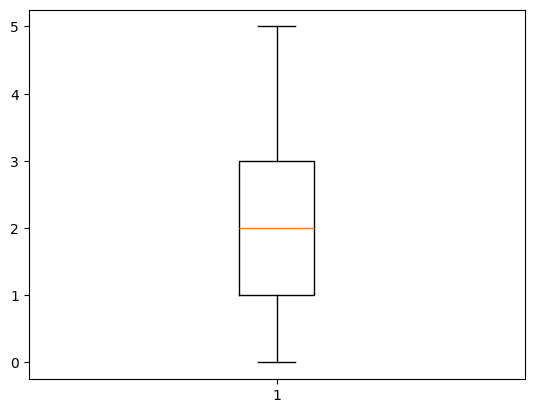

In [16]:
plt.boxplot(df['job_detail_year_of_exp'])

In [17]:
count_len_2 = df[df['job_detail_job_level'].apply(lambda x: len(x)) == 2]
display(count_len_2)

,url,source,crawl_date,company_name,company_position,job_detail_detail_position,company_size,job_detail_name,job_detail_salary,job_detail_part_time,job_detail_full_time,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level,job_detail_hybrid
186,https://www.topcv.vn/viec-lam/unity-game-devel...,TopCv,2024-04-21 16:48:50,CÔNG TY TNHH CÔNG NGHỆ TAAP VIỆT NAM,[Hà Nội],"- Hà Nội: D'Office Thành Thái, Cầu Giấy, Hà Nộ...",25-99 nhân viên,Unity Game Developer (Fresher - Junior),8 - 35 triệu,False,True,"[Yêu cầu ứng viên, • Ưu tiên ứng viên có từ 1 ...",1,"[fresher, junior]",False
238,https://www.topcv.vn/viec-lam/business-analyst...,TopCv,2024-04-21 17:00:56,CÔNG TY CỔ PHẦN CÔNG NGHỆ SOTATEK,[Hà Nội],"- Hà Nội: toà Golden Park, số 2 Phạm Văn Bạch,...",500-1000 nhân viên,Business Analyst (Junior - Senior),14 - 35 triệu,False,True,"[Yêu cầu ứng viên, 1,5 - 5 years of experience...",2,"[junior, senior]",True
346,https://www.topcv.vn/viec-lam/data-analyst-bus...,TopCv,2024-04-21 17:29:36,CÔNG TY TNHH HYBRID TECHNOLOGIES VIỆT NAM,[Hồ Chí Minh],"- Hồ Chí Minh: 90 Nguyễn Đình Chiểu, Phường Đa...",500-1000 nhân viên,Data Analyst/ Business Analyst (Fresher/Junior),Thoả thuận,False,True,"[Yêu cầu ứng viên, Must have:, Female, Bachelo...",1,"[fresher, junior]",False
666,https://www.topcv.vn/viec-lam/it-supervision-l...,TopCv,2024-04-21 18:44:25,CÔNG TY TNHH VSL VIỆT NAM,[Hồ Chí Minh],"- Hồ Chí Minh: Etown building, 364 Cong Hoa, W...",25-99 nhân viên,IT Supervision Level 1 (Fresher/ Intern - Engl...,6 - 10 triệu,False,True,"[Yêu cầu ứng viên, Graduated with bachelor in ...",0,"[intern, fresher]",False
829,https://www.topcv.vn/viec-lam/game-designer-th...,TopCv,2024-04-21 19:24:38,SonatGame Studio,[Hà Nội],- Hà Nội: Tầng 11 - Bamboo Airways Tower - 265...,25-99 nhân viên,Game Designer - Thiết Kế Game (Intern/Fresher),6 - 15 triệu,False,True,"[Yêu cầu ứng viên, - Có sự đam mê và tìm hiểu ...",1,"[intern, fresher]",False
836,https://www.topcv.vn/viec-lam/android-develope...,TopCv,2024-04-21 19:26:48,Công ty Cổ phần Công nghệ và Sáng tạo Rocket,[Hà Nội],"- Hà Nội: Tầng 8, toà Gold Tower, 275 Nguyễn T...",100-499 nhân viên,Android Developer Intern/Fresher,3 - 10 triệu,False,True,"[Yêu cầu ứng viên, Ưu tiên đã tốt nghiệp có th...",1,"[intern, fresher]",False
842,https://www.topcv.vn/viec-lam/junior-senior-ja...,TopCv,2024-04-21 19:28:08,Công ty TNHH Shinhan DS Việt Nam,[Hồ Chí Minh],"- Hồ Chí Minh: Centec Tower, 72-74 Nguyễn Thị ...",25-99 nhân viên,Junior/Senior Java Developer,"Tới 1,600 USD",False,True,"[Yêu cầu ứng viên, From 2 years of experience ...",2,"[junior, senior]",False
951,https://www.topcv.vn/viec-lam/fresher-junior-q...,TopCv,2024-04-21 19:55:15,FPT Software,[Hà Nội],- Hà Nội,10000+ nhân viên,Fresher/Junior QA,6 - 8 triệu,False,True,"[Yêu cầu ứng viên, Good stance and long-term c...",1,"[fresher, junior]",False
1004,https://www.topcv.vn/viec-lam/product-marketin...,TopCv,2024-04-21 20:07:55,SonatGame Studio,[Hà Nội],- Hà Nội: Tầng 11 - Bamboo Airways Tower - 265...,25-99 nhân viên,Product Marketing (Fresher/Junior),"Tới 1,000 USD",False,True,"[Yêu cầu ứng viên, - Tốt nghiệp loại Giỏi trở ...",1,"[fresher, junior]",False
1098,https://www.topcv.vn/viec-lam/product-owner-ju...,TopCv,2024-04-21 20:36:41,Công ty Cổ phần Thời Trang Yody,[Hà Nội & 2 nơi khác],"- Hà Nội: Số 90 Nguyễn Tuân, Thanh Xuân",5000+ nhân viên,Product Owner (Junior/Senior),Thoả thuận,False,True,"[Yêu cầu ứng viên, Junior, - Bachelor‘s degree...",1,"[junior, senior]",False


# Just use the highest requirements levels

In [18]:
filtered_indices = df[df['job_detail_job_level'].apply(lambda x: len(x)) == 2].index
df.loc[filtered_indices, 'job_detail_job_level'] = df.loc[filtered_indices]['job_detail_job_level'].apply(lambda x: [x[-1]])
display(df.loc[filtered_indices, 'job_detail_job_level'])

186      [junior]
238      [senior]
346      [junior]
666     [fresher]
829     [fresher]
836     [fresher]
842      [senior]
951      [junior]
1004     [junior]
1098     [senior]
1426    [fresher]
1427     [junior]
1428    [fresher]
1474     [junior]
1661     [senior]
2031     [senior]
Name: job_detail_job_level, dtype: object

In [19]:
filtered_indices = df[df['job_detail_job_level'].apply(lambda x: len(x)) != 0].index
df.loc[filtered_indices, 'job_detail_job_level'] = df.loc[filtered_indices]['job_detail_job_level'].apply(lambda x: x[-1])
display(df.loc[filtered_indices, 'job_detail_job_level'].head())

0      senior
9      junior
14    fresher
22    fresher
32     senior
Name: job_detail_job_level, dtype: object

In [20]:
filtered_indices = df[df['job_detail_job_level'].apply(len) == 0].index

# Set these values to NaN (null)
df.loc[filtered_indices, 'job_detail_job_level'] = None
display(df.loc[filtered_indices, 'job_detail_job_level'].head())

1    None
2    None
3    None
4    None
5    None
Name: job_detail_job_level, dtype: object

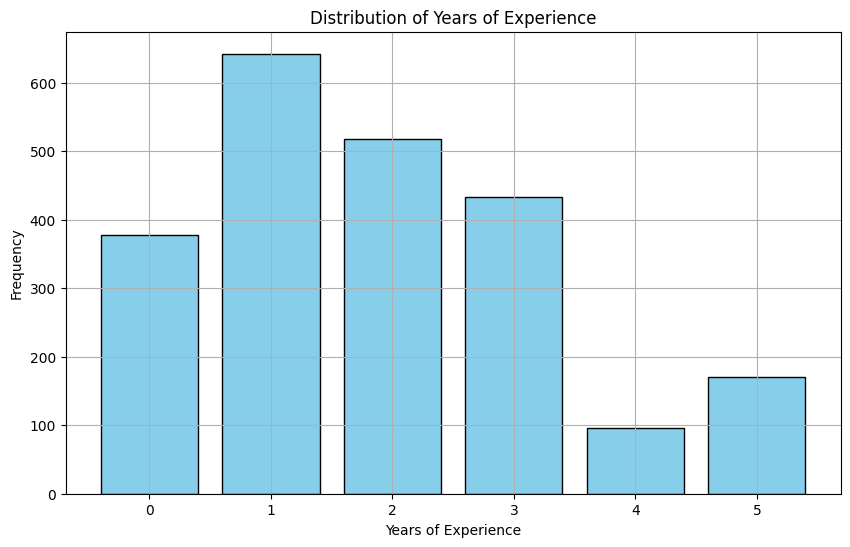

In [21]:
experience_counts = df['job_detail_year_of_exp'].value_counts().sort_index()

years_of_experience = experience_counts.index.tolist()

frequency = experience_counts.values.tolist()

plt.figure(figsize=(10, 6))
plt.bar(years_of_experience, frequency, color='skyblue', edgecolor='black')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Experience')
plt.xticks(years_of_experience)
plt.grid(True)
plt.show()


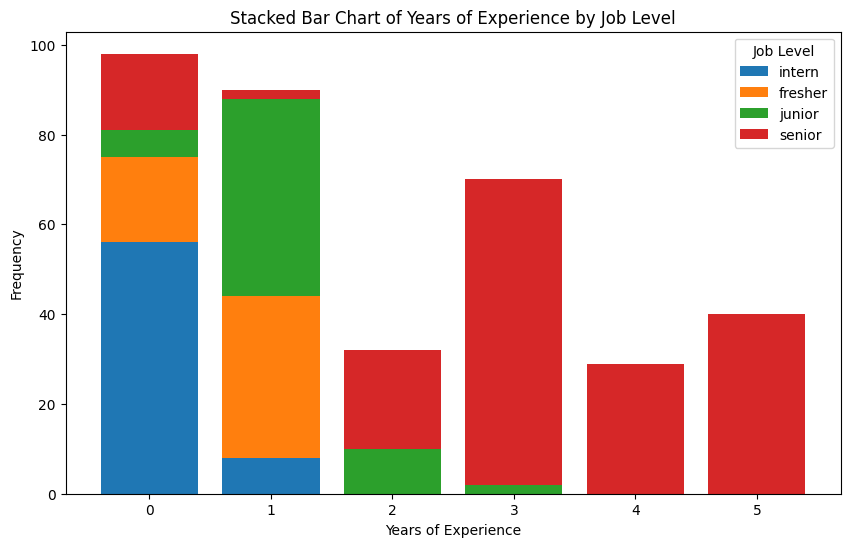

In [22]:
# Order the job levels
job_level_order = ['intern', 'fresher', 'junior', 'senior']

# Group the DataFrame by 'job_detail_year_of_exp' and 'job_detail_job_level' and count the occurrences
grouped = df.groupby(['job_detail_year_of_exp', 'job_detail_job_level']).size().unstack(fill_value=0)

# Reorder the columns based on the specified order
grouped = grouped[job_level_order]

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))

# Loop through each job level and plot a stacked bar for each year of experience
bottom = None
for job_level in grouped.columns:
    plt.bar(grouped.index, grouped[job_level], label=job_level, bottom=bottom)
    if bottom is None:
        bottom = grouped[job_level]
    else:
        bottom += grouped[job_level]

plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of Years of Experience by Job Level')
plt.legend(title='Job Level')
plt.show()

In [23]:
filtered_rows = df[(df['job_detail_year_of_exp'] == 0) & (df['job_detail_job_level'] == 'senior')]

# Display the filtered rows
display(filtered_rows.head())

,url,source,crawl_date,company_name,company_position,job_detail_detail_position,company_size,job_detail_name,job_detail_salary,job_detail_part_time,job_detail_full_time,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level,job_detail_hybrid
270,https://www.topcv.vn/viec-lam/flutter-develope...,TopCv,2024-04-21 17:09:06,Công ty cổ phần Synodus,[Hà Nội],"- Hà Nội: 3rd Floor, The West Tower, 265 Cau G...",100-499 nhân viên,Flutter Developer (Senior),Tới 40 triệu,False,True,"[Yêu cầu ứng viên, Tốt nghiệp hệ chính quy Đại...",0,senior,False
348,https://www.topcv.vn/viec-lam/middle-senior-fr...,TopCv,2024-04-21 17:29:58,CÔNG TY TNHH HYBRID TECHNOLOGIES VIỆT NAM,[Đà Nẵng],"- Đà Nẵng: 255-257 hùng vương, Thanh Khê",500-1000 nhân viên,Middle/Senior Front-End Developer,"800 - 1,500 USD",False,True,"[Yêu cầu ứng viên, Bạn cần có:, Ít nhất 3 năm ...",0,senior,False
515,https://www.topcv.vn/viec-lam/senior-quality-a...,TopCv,2024-04-21 18:07:55,BRANCH OF MONSTARLAB VIETNAM,[Đà Nẵng],"- Đà Nẵng: Văn phòng Monstarlab Đà Nẵng, đường...",100-499 nhân viên,Senior Quality Assurance Automation Engineer,"1,800 - 2,000 USD",False,True,"[Yêu cầu ứng viên, At least 3 years of experie...",0,senior,False
549,https://www.topcv.vn/viec-lam/senior-fullstack...,TopCv,2024-04-21 18:16:32,Công ty TNHH Giải Pháp Công Nghệ và Phần Mềm P...,[Hồ Chí Minh],"- Hồ Chí Minh: Tầng 20-24, Viettel Complex Tow...",100-499 nhân viên,"Senior Fullstack Engineer (Python,VueJS)","3,000 - 4,000 USD",False,True,"[Yêu cầu ứng viên, Có ít nhất 7 năm kinh nghiệ...",0,senior,True
681,https://www.topcv.vn/viec-lam/senior-backend-e...,TopCv,2024-04-21 18:47:51,Công ty TNHH Giải Pháp Công Nghệ và Phần Mềm P...,[Hà Nội & 2 nơi khác],"- Hồ Chí Minh: Tầng 20-24, Viettel Complex Tow...",100-499 nhân viên,Senior Backend Engineer (Golang),"Tới 3,100 USD",False,True,"[Yêu cầu ứng viên, Có ít nhất 5 năm kinh nghiệ...",0,senior,False


In [24]:
df.iloc[270]['url']

'https://www.topcv.vn/viec-lam/flutter-developer-senior/1298909.html?ta_source=ITJobs_LinkDetail'

In [25]:
time_unit = [
    'years',
    'year',
    'months',
    'month',
    'năm kinh nghiệm',
    'tháng'
]
def extract_year(exp):
    for year_exp in exp:
        pattern = f"(\S+)\s({'|'.join(time_unit)})"
        matches = re.findall(pattern, year_exp)
        for match in matches:
            number_list = re.findall('\d+', match[0])
            if match[1] in ['months', 'month', 'tháng']:
                number = [float(number)/12 for number in number_list]
            else:
                number = [float(number) for number in number_list]
            while len(number) != 0:
                if number[0]>10:
                    number.remove(number[0])
                else:
                    break
            return number[0] if len(number)!=0 else None


In [26]:
df['job_detail_year_exp_from_requirement'] = df['job_detail_job_requirements_line'].map(lambda exp:
    extract_year(exp)
)
df['job_detail_year_exp_from_requirement'].describe()

count    1259.000000
mean        2.420704
std         1.518722
min         0.166667
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: job_detail_year_exp_from_requirement, dtype: float64

In [27]:
display(df.head())

,url,source,crawl_date,company_name,company_position,job_detail_detail_position,company_size,job_detail_name,job_detail_salary,job_detail_part_time,job_detail_full_time,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level,job_detail_hybrid,job_detail_year_exp_from_requirement
0,https://www.topcv.vn/viec-lam/senior-business-...,TopCv,2024-04-21 16:07:23,Công ty CP Kinh doanh F88,[Hà Nội],"- Hà Nội: 275 Nguyễn Trãi, Thanh Xuân, Hà Nội,...",5000+ nhân viên,Senior Business Analyst (Có Kinh Nghiệm Bankin...,20 - 40 triệu,False,True,"[Yêu cầu ứng viên, Học vấn: Tốt nghiệp Đại học...",3,senior,False,3.0
1,https://www.topcv.vn/viec-lam/nhan-vien-ky-thu...,TopCv,2024-04-21 16:07:31,CHI NHÁNH 4 - CÔNG TY TNHH TRUYỀN HÌNH CÁP SAI...,[Hồ Chí Minh],- Hồ Chí Minh: Thủ Đức,25-99 nhân viên,Nhân Viên Kỹ Thuật Truyền Hình Cáp - Không Yêu...,7 - 10 triệu,False,True,"[Yêu cầu ứng viên, - Chiều cao : 1m60 trở lên,...",0,None,False,NaN
2,https://www.topcv.vn/viec-lam/it-comtor-tieng-...,TopCv,2024-04-21 16:07:46,CÔNG TY TNHH BTC STUDIO,[Hà Nội],"- Hà Nội: Toà nhà Tây Hà, 19 Tố Hữu, Trung Văn...",25-99 nhân viên,IT Comtor Tiếng Nhật Thu Nhập Lên Đến 35Triệu/...,15 - 35 triệu,False,True,"[Yêu cầu ứng viên, Tiếng Nhật N2 giao tiếp tốt...",1,None,True,1.0
3,https://www.topcv.vn/viec-lam/ux-designer-upto...,TopCv,2024-04-21 16:07:56,CÔNG TY CỔ PHẦN SYSTEMATIC FUNCTIONS,[Hà Nội],"- Hà Nội: Khu đô thị Mễ Trì Hạ, Mễ Trì, Nam Từ...",100-499 nhân viên,UX Designer (Upto 30M),Tới 30 triệu,False,True,"[Yêu cầu ứng viên, ● Có kinh nghiệm làm việc t...",0,None,False,NaN
4,https://www.topcv.vn/viec-lam/back-office-mana...,TopCv,2024-04-21 16:08:23,CÔNG TY CỔ PHẦN CÔNG NGHỆ NAMI,[Hồ Chí Minh],- Hồ Chí Minh: Villa A4-2 Khu dân cư EverRich ...,25-99 nhân viên,Back Office Manager (Trưởng Phòng Hành Chính N...,Thoả thuận,False,True,"[Yêu cầu ứng viên, - Bachelor's degree in Busi...",3,None,False,3.0


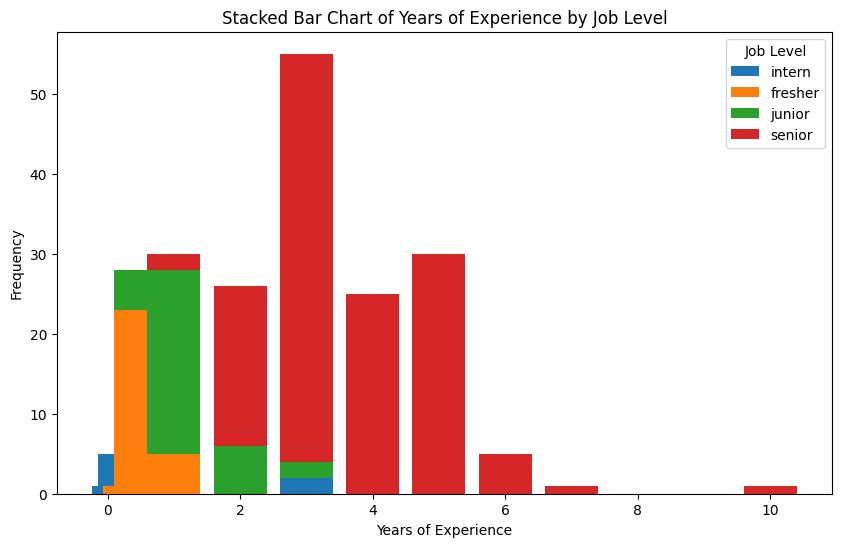

In [28]:
# Order the job levels
job_level_order = ['intern', 'fresher', 'junior', 'senior']

# Group the DataFrame by 'job_detail_year_exp_from_requirement' and 'job_detail_job_level' and count the occurrences
grouped = df.groupby(['job_detail_year_exp_from_requirement', 'job_detail_job_level']).size().unstack(fill_value=0)

# Reorder the columns based on the specified order
grouped = grouped[job_level_order]

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))

# Loop through each job level and plot a stacked bar for each year of experience
bottom = None
for job_level in grouped.columns:
    plt.bar(grouped.index, grouped[job_level], label=job_level, bottom=bottom)
    if bottom is None:
        bottom = grouped[job_level]
    else:
        bottom += grouped[job_level]

plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of Years of Experience by Job Level')
plt.legend(title='Job Level')
plt.show()

In [29]:
df.loc[(df['job_detail_year_exp_from_requirement'] == 3.0) & (df['job_detail_job_level'] == 'intern')]

,url,source,crawl_date,company_name,company_position,job_detail_detail_position,company_size,job_detail_name,job_detail_salary,job_detail_part_time,job_detail_full_time,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level,job_detail_hybrid,job_detail_year_exp_from_requirement
622,https://www.topcv.vn/viec-lam/software-enginee...,TopCv,2024-04-21 18:33:39,CÔNG TY TNHH RABILOO,[Hà Nội],"- Hà Nội: Tầng 3, Tòa B1, Roman Plaza, đường T...",100-499 nhân viên,Software Engineer Intern,Thoả thuận,False,True,"[Yêu cầu ứng viên, Fresh graduated or 3rd/4th ...",0,intern,False,3.0
2033,https://www.topcv.vn/viec-lam/internal-communi...,TopCv,2024-04-22 22:49:45,Công ty cổ phần Synodus,[Hà Nội],"- Hà Nội: 3rd Floor, The West Tower, 265 Cau G...",100-499 nhân viên,Internal Communication Executive (Middle),Thoả thuận,False,True,"[Yêu cầu ứng viên, 3+ years corporate communic...",0,intern,False,3.0


In [30]:
# df['job_detail_year_exp_from_requirement_and_year_exp'] = 
df[["job_detail_year_exp_from_requirement", "job_detail_year_of_exp"]].max(axis=1).describe()

count    2237.000000
mean        2.067799
std         1.536139
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
dtype: float64

In [31]:
df['job_detail_year_exp_from_requirement_and_year_exp'] = df[["job_detail_year_exp_from_requirement", "job_detail_year_of_exp"]].max(axis=1)

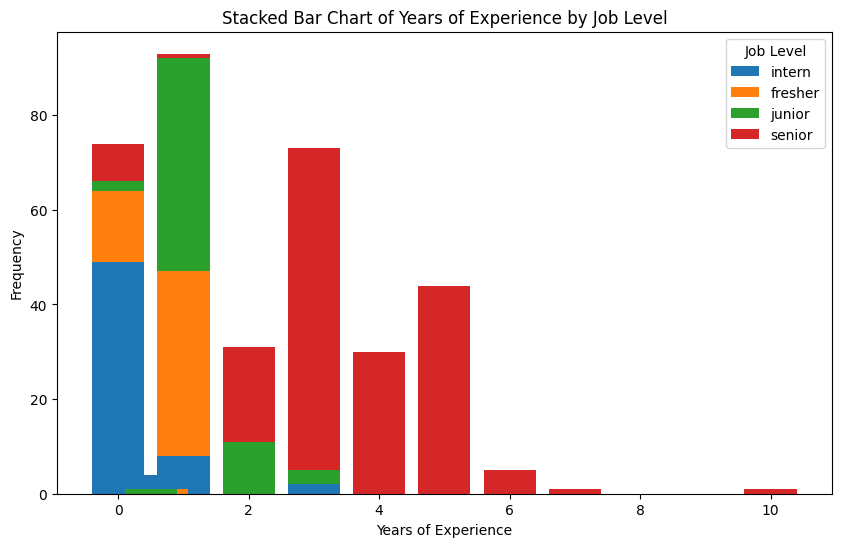

In [32]:
# Order the job levels
job_level_order = ['intern', 'fresher', 'junior', 'senior']

# Group the DataFrame by 'job_detail_year_exp_from_requirement' and 'job_detail_job_level' and count the occurrences
grouped = df.groupby(['job_detail_year_exp_from_requirement_and_year_exp', 'job_detail_job_level']).size().unstack(fill_value=0)

# Reorder the columns based on the specified order
grouped = grouped[job_level_order]

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))

# Loop through each job level and plot a stacked bar for each year of experience
bottom = None
for job_level in grouped.columns:
    plt.bar(grouped.index, grouped[job_level], label=job_level, bottom=bottom)
    if bottom is None:
        bottom = grouped[job_level]
    else:
        bottom += grouped[job_level]

plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of Years of Experience by Job Level')
plt.legend(title='Job Level')
plt.show()

In [33]:
df.loc[(df['job_detail_year_exp_from_requirement_and_year_exp'] == 0) & (df['job_detail_job_level'] == 'senior')]

,url,source,crawl_date,company_name,company_position,job_detail_detail_position,company_size,job_detail_name,job_detail_salary,job_detail_part_time,job_detail_full_time,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level,job_detail_hybrid,job_detail_year_exp_from_requirement,job_detail_year_exp_from_requirement_and_year_exp
1119,https://www.topcv.vn/viec-lam/telecom-senior-e...,TopCv,2024-04-21 20:43:05,CÔNG TY TNHH CÔNG NGHỆ HỒNG CƠ,"[Hồ Chí Minh, Hà Nội]","- Hồ Chí Minh: 124 Huỳnh Tấn Phát, Phường Tân ...",25-99 nhân viên,Telecom Senior Engineer,Thoả thuận,False,True,"[Yêu cầu ứng viên, - Nam độ tuổi 25-30, - Sử d...",0,senior,False,NaN,0.0
1136,https://www.topcv.vn/viec-lam/senior-blockchai...,TopCv,2024-04-21 20:47:39,CÔNG TY CỔ PHẦN CÔNG NGHỆ AMELA VIỆT NAM,[Hà Nội],"- Hà Nội: Tầng 5, tháp A, tòa Keangnam, Mễ Trì...",100-499 nhân viên,Senior Blockchain Developer,"Tới 4,000 USD",True,False,"[Yêu cầu ứng viên, Bachelor’s or Master’s degr...",0,senior,False,NaN,0.0
1167,https://www.topcv.vn/viec-lam/senior-backend-e...,TopCv,2024-04-21 20:54:41,Công ty Cổ phần VinBigData,[Hà Nội],"- Hà Nội: Tầng 9, tòa nhà Century, Times City,...",100-499 nhân viên,Senior Backend Engineer (Java/Golang),Thoả thuận,False,True,"[Yêu cầu ứng viên, Kinh nghiệm:, Ngôn ngữ: Gol...",0,senior,False,NaN,0.0
1353,https://www.topcv.vn/viec-lam/senior-year-it-s...,TopCv,2024-04-21 21:40:55,LG Electronics Development Vietnam Company Lim...,[Hà Nội],"- Hà Nội: Tầng 32, 34, Keangnam Hanoi Landmark...",1000+ nhân viên,Senior-Year IT Students - LG Track Program,Thoả thuận,False,True,"[Yêu cầu ứng viên, - Sinh viên Đại Học năm cuố...",0,senior,False,NaN,0.0
1757,https://www.topcv.vn/viec-lam/senior-data-engi...,TopCv,2024-04-21 23:20:46,Ngân Hàng TMCP Việt Nam Thịnh Vượng (VPBank),[Hà Nội],"- Hà Nội: VPBank Tower, 89 Láng Hạ, Đống Đa",10000+ nhân viên,Senior Data Engineer RBD,Thoả thuận,False,True,"[Yêu cầu ứng viên, Tốt nghiệp Đại học hoặc cao...",0,senior,False,NaN,0.0
1863,https://www.topcv.vn/viec-lam/senior-c-enginee...,TopCv,2024-04-22 22:11:53,FPT Software,[Hà Nội],- Hà Nội: Cầu Giấy,10000+ nhân viên,Senior C++ Engineer,Thoả thuận,False,True,"[Yêu cầu ứng viên, At least 2 YOE in C/C++ (ve...",0,senior,False,NaN,0.0
1881,https://www.topcv.vn/viec-lam/ruby-on-rails-de...,TopCv,2024-04-22 22:15:34,Viettel Software,[Hà Nội],"- Hà Nội: Tầng 5, Tòa nhà Thành Công, 80 Dịch ...",500-1000 nhân viên,Ruby On Rails Developer (Middle/Senior),Tới 45 triệu,False,True,"[Yêu cầu ứng viên, 1. Về kỹ thuật:, - Thành th...",0,senior,False,NaN,0.0
2205,https://www.topcv.vn/viec-lam/dev-mobile-senio...,TopCv,2024-04-22 23:26:43,CÔNG TY TNHH OHMIDAS VIỆT NAM,[Hà Nội],"- Hà Nội: Hoàng Quốc Việt , Cầu Giấy",25-99 nhân viên,Dev Mobile/Senior Dev Mobile,10 - 30 triệu,False,True,"[Yêu cầu ứng viên, ・Tốt nghiệp ĐH chuyên ngành...",0,senior,False,NaN,0.0


In [34]:
df.iloc[1136]

url                                                  https://www.topcv.vn/viec-lam/senior-blockchai...
source                                                                                           TopCv
crawl_date                                                                         2024-04-21 20:47:39
company_name                                                  CÔNG TY CỔ PHẦN CÔNG NGHỆ AMELA VIỆT NAM
company_position                                                                              [Hà Nội]
job_detail_detail_position                           - Hà Nội: Tầng 5, tháp A, tòa Keangnam, Mễ Trì...
company_size                                                                         100-499 nhân viên
job_detail_name                                                            Senior Blockchain Developer
job_detail_salary                                                                        Tới 4,000 USD
job_detail_part_time                                                     

# Salary

In [35]:
display(df.head(5))

,url,source,crawl_date,company_name,company_position,job_detail_detail_position,company_size,job_detail_name,job_detail_salary,job_detail_part_time,job_detail_full_time,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level,job_detail_hybrid,job_detail_year_exp_from_requirement,job_detail_year_exp_from_requirement_and_year_exp
0,https://www.topcv.vn/viec-lam/senior-business-...,TopCv,2024-04-21 16:07:23,Công ty CP Kinh doanh F88,[Hà Nội],"- Hà Nội: 275 Nguyễn Trãi, Thanh Xuân, Hà Nội,...",5000+ nhân viên,Senior Business Analyst (Có Kinh Nghiệm Bankin...,20 - 40 triệu,False,True,"[Yêu cầu ứng viên, Học vấn: Tốt nghiệp Đại học...",3,senior,False,3.0,3.0
1,https://www.topcv.vn/viec-lam/nhan-vien-ky-thu...,TopCv,2024-04-21 16:07:31,CHI NHÁNH 4 - CÔNG TY TNHH TRUYỀN HÌNH CÁP SAI...,[Hồ Chí Minh],- Hồ Chí Minh: Thủ Đức,25-99 nhân viên,Nhân Viên Kỹ Thuật Truyền Hình Cáp - Không Yêu...,7 - 10 triệu,False,True,"[Yêu cầu ứng viên, - Chiều cao : 1m60 trở lên,...",0,None,False,NaN,0.0
2,https://www.topcv.vn/viec-lam/it-comtor-tieng-...,TopCv,2024-04-21 16:07:46,CÔNG TY TNHH BTC STUDIO,[Hà Nội],"- Hà Nội: Toà nhà Tây Hà, 19 Tố Hữu, Trung Văn...",25-99 nhân viên,IT Comtor Tiếng Nhật Thu Nhập Lên Đến 35Triệu/...,15 - 35 triệu,False,True,"[Yêu cầu ứng viên, Tiếng Nhật N2 giao tiếp tốt...",1,None,True,1.0,1.0
3,https://www.topcv.vn/viec-lam/ux-designer-upto...,TopCv,2024-04-21 16:07:56,CÔNG TY CỔ PHẦN SYSTEMATIC FUNCTIONS,[Hà Nội],"- Hà Nội: Khu đô thị Mễ Trì Hạ, Mễ Trì, Nam Từ...",100-499 nhân viên,UX Designer (Upto 30M),Tới 30 triệu,False,True,"[Yêu cầu ứng viên, ● Có kinh nghiệm làm việc t...",0,None,False,NaN,0.0
4,https://www.topcv.vn/viec-lam/back-office-mana...,TopCv,2024-04-21 16:08:23,CÔNG TY CỔ PHẦN CÔNG NGHỆ NAMI,[Hồ Chí Minh],- Hồ Chí Minh: Villa A4-2 Khu dân cư EverRich ...,25-99 nhân viên,Back Office Manager (Trưởng Phòng Hành Chính N...,Thoả thuận,False,True,"[Yêu cầu ứng viên, - Bachelor's degree in Busi...",3,None,False,3.0,3.0


In [36]:
df.iloc[171]

url                                                  https://www.topcv.vn/viec-lam/senior-android-d...
source                                                                                           TopCv
crawl_date                                                                         2024-04-21 16:45:29
company_name                                         Công Ty Cổ Phần Đầu Tư Và Phát Triển Công Nghệ...
company_position                                                                              [Hà Nội]
job_detail_detail_position                                  - Hà Nội: 60B Nguyễn Huy Tưởng, Thanh Xuân
company_size                                                                           25-99 nhân viên
job_detail_name                                                               Senior Android Developer
job_detail_salary                                                                       25 - 400 triệu
job_detail_part_time                                                     

In [37]:
# problem: '.', ',' in salary; 'usd' and 'trieu' is wrong 

metric_dict = {
    'triệu': 1000000,
    'tr': 1000000,
    'usd': 25000
}

def extract_salary(salary):
    matches = re.findall(r'[-+]?(?:\d*\.*\d+)', salary.replace(',', ''))
    number = -1
    for metric in metric_dict.keys():
        if metric in salary.lower():
            number = metric_dict[metric]
    if 'usd' in salary.lower():
        matches = [match.replace('.', '') for match in matches]
        if float(matches[0]) > 5000000:
            number = 1
        # print(matches)
    return [float(match) * (number if float(match)<5000000 else 1) for match in matches]

df['job_detail_salary_range'] = df['job_detail_salary'].map(extract_salary)
df['job_detail_currency'] = df['job_detail_salary'].map(lambda x: 'usd' if 'usd' in x.lower() else None)
df['new_col'] = df['job_detail_salary_range'].map(lambda x: len(x))
# display(df['job_detail_salary_range'].describe())
display(df.head(5))
# display(df.loc[df['new_col'] == 4])

,url,source,crawl_date,company_name,company_position,job_detail_detail_position,company_size,job_detail_name,job_detail_salary,job_detail_part_time,job_detail_full_time,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level,job_detail_hybrid,job_detail_year_exp_from_requirement,job_detail_year_exp_from_requirement_and_year_exp,job_detail_salary_range,job_detail_currency,new_col
0,https://www.topcv.vn/viec-lam/senior-business-...,TopCv,2024-04-21 16:07:23,Công ty CP Kinh doanh F88,[Hà Nội],"- Hà Nội: 275 Nguyễn Trãi, Thanh Xuân, Hà Nội,...",5000+ nhân viên,Senior Business Analyst (Có Kinh Nghiệm Bankin...,20 - 40 triệu,False,True,"[Yêu cầu ứng viên, Học vấn: Tốt nghiệp Đại học...",3,senior,False,3.0,3.0,"[20000000.0, 40000000.0]",None,2
1,https://www.topcv.vn/viec-lam/nhan-vien-ky-thu...,TopCv,2024-04-21 16:07:31,CHI NHÁNH 4 - CÔNG TY TNHH TRUYỀN HÌNH CÁP SAI...,[Hồ Chí Minh],- Hồ Chí Minh: Thủ Đức,25-99 nhân viên,Nhân Viên Kỹ Thuật Truyền Hình Cáp - Không Yêu...,7 - 10 triệu,False,True,"[Yêu cầu ứng viên, - Chiều cao : 1m60 trở lên,...",0,None,False,NaN,0.0,"[7000000.0, 10000000.0]",None,2
2,https://www.topcv.vn/viec-lam/it-comtor-tieng-...,TopCv,2024-04-21 16:07:46,CÔNG TY TNHH BTC STUDIO,[Hà Nội],"- Hà Nội: Toà nhà Tây Hà, 19 Tố Hữu, Trung Văn...",25-99 nhân viên,IT Comtor Tiếng Nhật Thu Nhập Lên Đến 35Triệu/...,15 - 35 triệu,False,True,"[Yêu cầu ứng viên, Tiếng Nhật N2 giao tiếp tốt...",1,None,True,1.0,1.0,"[15000000.0, 35000000.0]",None,2
3,https://www.topcv.vn/viec-lam/ux-designer-upto...,TopCv,2024-04-21 16:07:56,CÔNG TY CỔ PHẦN SYSTEMATIC FUNCTIONS,[Hà Nội],"- Hà Nội: Khu đô thị Mễ Trì Hạ, Mễ Trì, Nam Từ...",100-499 nhân viên,UX Designer (Upto 30M),Tới 30 triệu,False,True,"[Yêu cầu ứng viên, ● Có kinh nghiệm làm việc t...",0,None,False,NaN,0.0,[30000000.0],None,1
4,https://www.topcv.vn/viec-lam/back-office-mana...,TopCv,2024-04-21 16:08:23,CÔNG TY CỔ PHẦN CÔNG NGHỆ NAMI,[Hồ Chí Minh],- Hồ Chí Minh: Villa A4-2 Khu dân cư EverRich ...,25-99 nhân viên,Back Office Manager (Trưởng Phòng Hành Chính N...,Thoả thuận,False,True,"[Yêu cầu ứng viên, - Bachelor's degree in Busi...",3,None,False,3.0,3.0,[],None,0


In [38]:
display(df.loc[df['job_detail_salary_range'].apply(lambda x: len(x)) > 2])

,url,source,crawl_date,company_name,company_position,job_detail_detail_position,company_size,job_detail_name,job_detail_salary,job_detail_part_time,job_detail_full_time,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level,job_detail_hybrid,job_detail_year_exp_from_requirement,job_detail_year_exp_from_requirement_and_year_exp,job_detail_salary_range,job_detail_currency,new_col


In [39]:
df['job_detail_salary_range_max'] = df['job_detail_salary_range'].apply(lambda x: x[-1] if len(x) != 0 else 0)
df['job_detail_salary_range_min'] = df['job_detail_salary_range'].apply(lambda x: x[0] if len(x) == 2 else 0)

In [40]:
df.head(5)

,url,source,crawl_date,company_name,company_position,job_detail_detail_position,company_size,job_detail_name,job_detail_salary,job_detail_part_time,...,job_detail_year_of_exp,job_detail_job_level,job_detail_hybrid,job_detail_year_exp_from_requirement,job_detail_year_exp_from_requirement_and_year_exp,job_detail_salary_range,job_detail_currency,new_col,job_detail_salary_range_max,job_detail_salary_range_min
0,https://www.topcv.vn/viec-lam/senior-business-...,TopCv,2024-04-21 16:07:23,Công ty CP Kinh doanh F88,[Hà Nội],"- Hà Nội: 275 Nguyễn Trãi, Thanh Xuân, Hà Nội,...",5000+ nhân viên,Senior Business Analyst (Có Kinh Nghiệm Bankin...,20 - 40 triệu,False,...,3,senior,False,3.0,3.0,"[20000000.0, 40000000.0]",None,2,40000000.0,20000000.0
1,https://www.topcv.vn/viec-lam/nhan-vien-ky-thu...,TopCv,2024-04-21 16:07:31,CHI NHÁNH 4 - CÔNG TY TNHH TRUYỀN HÌNH CÁP SAI...,[Hồ Chí Minh],- Hồ Chí Minh: Thủ Đức,25-99 nhân viên,Nhân Viên Kỹ Thuật Truyền Hình Cáp - Không Yêu...,7 - 10 triệu,False,...,0,None,False,NaN,0.0,"[7000000.0, 10000000.0]",None,2,10000000.0,7000000.0
2,https://www.topcv.vn/viec-lam/it-comtor-tieng-...,TopCv,2024-04-21 16:07:46,CÔNG TY TNHH BTC STUDIO,[Hà Nội],"- Hà Nội: Toà nhà Tây Hà, 19 Tố Hữu, Trung Văn...",25-99 nhân viên,IT Comtor Tiếng Nhật Thu Nhập Lên Đến 35Triệu/...,15 - 35 triệu,False,...,1,None,True,1.0,1.0,"[15000000.0, 35000000.0]",None,2,35000000.0,15000000.0
3,https://www.topcv.vn/viec-lam/ux-designer-upto...,TopCv,2024-04-21 16:07:56,CÔNG TY CỔ PHẦN SYSTEMATIC FUNCTIONS,[Hà Nội],"- Hà Nội: Khu đô thị Mễ Trì Hạ, Mễ Trì, Nam Từ...",100-499 nhân viên,UX Designer (Upto 30M),Tới 30 triệu,False,...,0,None,False,NaN,0.0,[30000000.0],None,1,30000000.0,0.0
4,https://www.topcv.vn/viec-lam/back-office-mana...,TopCv,2024-04-21 16:08:23,CÔNG TY CỔ PHẦN CÔNG NGHỆ NAMI,[Hồ Chí Minh],- Hồ Chí Minh: Villa A4-2 Khu dân cư EverRich ...,25-99 nhân viên,Back Office Manager (Trưởng Phòng Hành Chính N...,Thoả thuận,False,...,3,None,False,3.0,3.0,[],None,0,0.0,0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7cc87134b730>,
 'caps': [<matplotlib.lines.Line2D at 0x7cc87134bc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cc87134b490>],
 'medians': [<matplotlib.lines.Line2D at 0x7cc870ed00d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cc870ed0370>],
 'means': []}

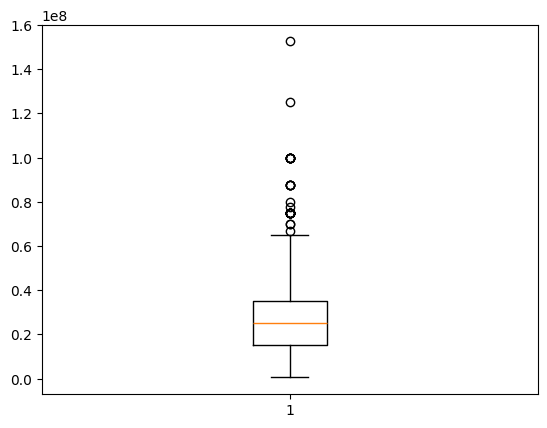

In [41]:
plt.boxplot(
    df['job_detail_salary_range_max'].loc[(df['job_detail_salary_range_max'] != 0) & (df['job_detail_salary_range_max'] != 400000000.0)]
)

In [42]:
df['job_detail_salary_range_max'].loc[(df['job_detail_salary_range_max'] != 0) & (df['job_detail_salary_range_max'] != 400000000.0)].idxmax()

711

In [43]:
df.iloc[711]['url']

'https://www.topcv.vn/viec-lam/senior-technical-project-product-manager/1292627.html?ta_source=ITJobs_LinkDetail'

In [44]:
df['job_detail_salary_range_max'].loc[df['job_detail_salary_range_max'] != 0].describe()

count    1.381000e+03
mean     2.658179e+07
std      1.951555e+07
min      5.000000e+05
25%      1.500000e+07
50%      2.500000e+07
75%      3.500000e+07
max      4.000000e+08
Name: job_detail_salary_range_max, dtype: float64

In [45]:
df.iloc[0]

url                                                  https://www.topcv.vn/viec-lam/senior-business-...
source                                                                                           TopCv
crawl_date                                                                         2024-04-21 16:07:23
company_name                                                                 Công ty CP Kinh doanh F88
company_position                                                                              [Hà Nội]
job_detail_detail_position                           - Hà Nội: 275 Nguyễn Trãi, Thanh Xuân, Hà Nội,...
company_size                                                                           5000+ nhân viên
job_detail_name                                      Senior Business Analyst (Có Kinh Nghiệm Bankin...
job_detail_salary                                                                        20 - 40 triệu
job_detail_part_time                                                     

# Extract job requirements

In [46]:
# build tree
f = open("skill_list.txt", "r")
skill_list = list(f)
trie_directory = '/trie_struture'
skill_list = [x.lower() for x in skill_list]

# for x in df['job_detail_job_requirements']:
#     skill_list.extend(x)

skill_list = list(set(skill_list))

file = open('skill_list.txt','w')
for skill in skill_list:
	file.write(skill.replace('\n', '').rstrip()+"\n")
file.close()

trie = Trie()
for skill in skill_list:
    trie.insert(skill)

In [47]:
def extract_skill(lines):
    res = []
    for line in lines:
        res.extend(search_in_trie(trie, line))
    return res

In [48]:
df['job_detail_extracted_skill'] = df['job_detail_job_requirements_line'].apply(extract_skill)

In [49]:
df.head()

,url,source,crawl_date,company_name,company_position,job_detail_detail_position,company_size,job_detail_name,job_detail_salary,job_detail_part_time,...,job_detail_job_level,job_detail_hybrid,job_detail_year_exp_from_requirement,job_detail_year_exp_from_requirement_and_year_exp,job_detail_salary_range,job_detail_currency,new_col,job_detail_salary_range_max,job_detail_salary_range_min,job_detail_extracted_skill
0,https://www.topcv.vn/viec-lam/senior-business-...,TopCv,2024-04-21 16:07:23,Công ty CP Kinh doanh F88,[Hà Nội],"- Hà Nội: 275 Nguyễn Trãi, Thanh Xuân, Hà Nội,...",5000+ nhân viên,Senior Business Analyst (Có Kinh Nghiệm Bankin...,20 - 40 triệu,False,...,senior,False,3.0,3.0,"[20000000.0, 40000000.0]",None,2,40000000.0,20000000.0,[ba]
1,https://www.topcv.vn/viec-lam/nhan-vien-ky-thu...,TopCv,2024-04-21 16:07:31,CHI NHÁNH 4 - CÔNG TY TNHH TRUYỀN HÌNH CÁP SAI...,[Hồ Chí Minh],- Hồ Chí Minh: Thủ Đức,25-99 nhân viên,Nhân Viên Kỹ Thuật Truyền Hình Cáp - Không Yêu...,7 - 10 triệu,False,...,None,False,NaN,0.0,"[7000000.0, 10000000.0]",None,2,10000000.0,7000000.0,[]
2,https://www.topcv.vn/viec-lam/it-comtor-tieng-...,TopCv,2024-04-21 16:07:46,CÔNG TY TNHH BTC STUDIO,[Hà Nội],"- Hà Nội: Toà nhà Tây Hà, 19 Tố Hữu, Trung Văn...",25-99 nhân viên,IT Comtor Tiếng Nhật Thu Nhập Lên Đến 35Triệu/...,15 - 35 triệu,False,...,None,True,1.0,1.0,"[15000000.0, 35000000.0]",None,2,35000000.0,15000000.0,[]
3,https://www.topcv.vn/viec-lam/ux-designer-upto...,TopCv,2024-04-21 16:07:56,CÔNG TY CỔ PHẦN SYSTEMATIC FUNCTIONS,[Hà Nội],"- Hà Nội: Khu đô thị Mễ Trì Hạ, Mễ Trì, Nam Từ...",100-499 nhân viên,UX Designer (Upto 30M),Tới 30 triệu,False,...,None,False,NaN,0.0,[30000000.0],None,1,30000000.0,0.0,"[sketch, figma, adobe xd, material design]"
4,https://www.topcv.vn/viec-lam/back-office-mana...,TopCv,2024-04-21 16:08:23,CÔNG TY CỔ PHẦN CÔNG NGHỆ NAMI,[Hồ Chí Minh],- Hồ Chí Minh: Villa A4-2 Khu dân cư EverRich ...,25-99 nhân viên,Back Office Manager (Trưởng Phòng Hành Chính N...,Thoả thuận,False,...,None,False,3.0,3.0,[],None,0,0.0,0.0,[basic]


In [50]:
cur = 6
print(df.iloc[cur]['job_detail_job_requirements_line'])
print(df.iloc[cur]['job_detail_extracted_skill'])

['Yêu cầu ứng viên', '- Nẵm vững HTML,CSS,SCSS,JS', '- Có kinh nghiệm với các framework sau: VueJS, NuxtJS (React-Native là điểm cộng)', '- Có kiến thức về RestAPI, WebSocket.', '- Thành thạo git, Github, Gitlab', '- Sử dụng được các công cụ design như: PTS, Figma', '- Biết thêm về Nodejs, PHP là một điểm cộng', '- Năng động, sáng tạo và chịu khó học tập', '- Kỹ năng làm việc nhóm', '- Tiếng anh giao tiếp']
['js', 'css', 'scss', 'html', 'vuejs', 'nuxtjs', 'restapi', 'github', 'git', 'gitlab', 'figma', 'php', 'nodejs']


In [51]:
print(search_in_trie(trie, '- Nẵm vững HTML,CSS,SCSS,JS'))

['js', 'css', 'scss', 'html']


In [52]:
df.to_csv('./transform_datn/transformed_TopCV.csv', index=False)